# Übung zu logistischer Regression

## Marks

Laden sie die Datei marks.txt aus dem gitlab-Repo und plotten Sie die 2-dimensionalen Merkmale. 
Färben Sie die Punkte der beiden Klassen unterschiedlich ein.
Die Datei enthält Datenpunkte von Studierenden. Die Merkmale entsprechen den Scores in zwei Prüfungen. 
Die zwei Klassen entsprechen ob eine Studierende für das nächste Semester zugelassen wurde oder nicht.

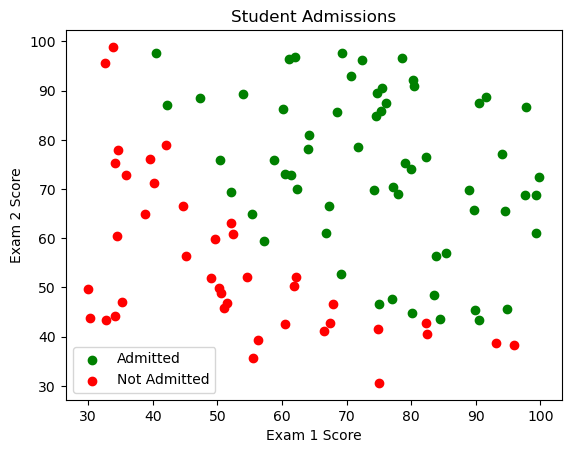

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

data = np.loadtxt('...\\marks.txt', delimiter=',')

X = data[:, :2]
y = data[:, 2]

X_positive = X[y == 1]
X_negative = X[y == 0]

plt.scatter(X_positive[:, 0], X_positive[:, 1], color='green', label='Admitted')
plt.scatter(X_negative[:, 0], X_negative[:, 1], color='red', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Student Admissions')
plt.legend()
plt.show()

## Trainieren der Logistischen Regression

Trainieren Sie eine Logistische Regression. Die Daten sind dabei in train/test zu splitten

Leaeve-one-out logistic regression, cross entropy loss, batch gradient

In [2]:
class MyLogReg:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        self.weights = np.zeros(num_features + 1) 
        
        X = np.hstack((np.ones((num_samples, 1)), X))
        
        for iteration in range(self.num_iterations):
            linear_model = np.dot(X, self.weights)
            
            y_pred = self.sigmoid(linear_model)
            
            gradient = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            
            self.weights -= self.learning_rate * gradient
    
    def predict(self, X):
        num_samples = X.shape[0]
        
        X = np.hstack((np.ones((num_samples, 1)), X))
        
        linear_model = np.dot(X, self.weights)
        y_pred = self.sigmoid(linear_model)
        return np.round(y_pred)

In [3]:
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics

loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logreg = MyLogReg()
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)

model = MyLogReg()
model.fit(X, y)
y_pred = model.predict(X)
acc = sklearn.metrics.accuracy_score(y, y_pred)

print(f"Accuracy on Entire Dataset: {acc}")

Accuracy on Entire Dataset: 0.6


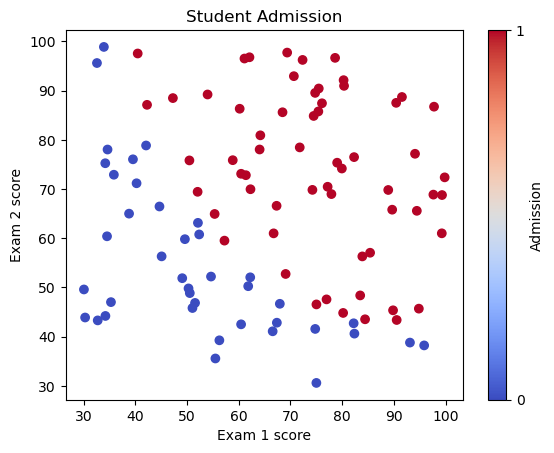

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Student Admission')
plt.colorbar(ticks=[0, 1], label='Admission')
plt.show()

# Logistic Regression different solver


Welche solver gibt es in SKLearn? Probieren Sie diese aus.
Vergleichen Sie die Fehlerraten.

Solver: Newton-CG - for small to medium datasets

In [5]:
from sklearn.linear_model import LogisticRegression

loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logreg = LogisticRegression(solver='newton-cg')
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)

model = LogisticRegression(solver='newton-cg')
model.fit(X, y)
y_pred = model.predict(X)
acc = sklearn.metrics.accuracy_score(y, y_pred)

print(f"Accuracy on Entire Dataset: {acc}")

Accuracy on Entire Dataset: 0.89


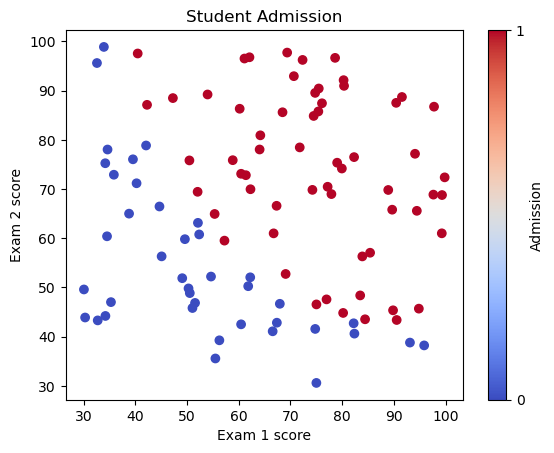

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Student Admission')
plt.colorbar(ticks=[0, 1], label='Admission')
plt.show()

Solver: Liblinear - for small to medium datasets

In [7]:
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X, y)
y_pred = model.predict(X)
acc = sklearn.metrics.accuracy_score(y, y_pred)

print(f"Accuracy on Entire Dataset: {acc}")

Accuracy on Entire Dataset: 0.87


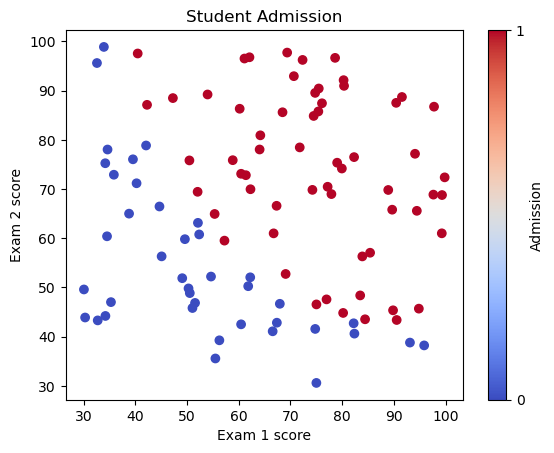

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Student Admission')
plt.colorbar(ticks=[0, 1], label='Admission')
plt.show()

Solver: L-BFGS - for moderately large dataset

In [9]:
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logreg = LogisticRegression(solver='lbfgs')
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)

model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
y_pred = model.predict(X)
acc = sklearn.metrics.accuracy_score(y, y_pred)

print(f"Accuracy on Entire Dataset: {acc}")

Accuracy on Entire Dataset: 0.89


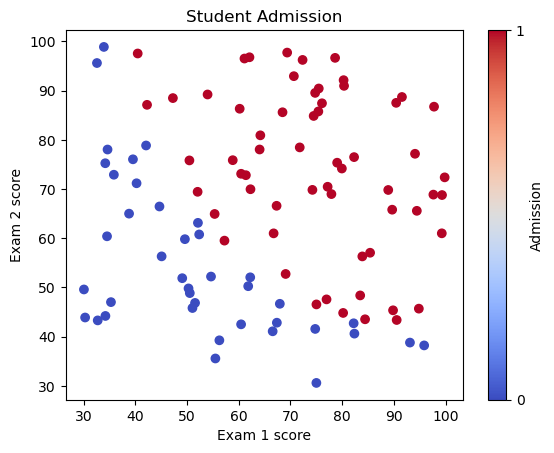

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Student Admission')
plt.colorbar(ticks=[0, 1], label='Admission')
plt.show()

Solver: Saga - for large scaling data

In [ ]:
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logreg = LogisticRegression(solver='saga')
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)

model = LogisticRegression(solver='saga')
model.fit(X, y)
y_pred = model.predict(X)
acc = sklearn.metrics.accuracy_score(y, y_pred)

print(f"Accuracy on Entire Dataset: {acc}")

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Student Admission')
plt.colorbar(ticks=[0, 1], label='Admission')
plt.show()

Interpretation: Logistic regression mit Solver performanter, unterschiedliche Solver für verschieden skalierende datasets

# Mehrklassen Problem

Laden Sie den MNist-Datensatz und Trainieren bzw. Evaluieren Sie eine Logistische Regression aus SKLearn. Verwenden Sie die Train_Test_Split-Methodologie (75%,25%).

One-vs-all logistic regression

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000, solver='saga')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")